In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import math
import cv2
import numpy as np
import random
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
def display_grayscale(image):
    plt.imshow(image, cmap='gray')
    plt.show()
def display_image(image):
    plt.imshow(image)
    plt.show()

(375, 499)


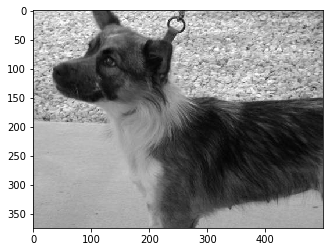

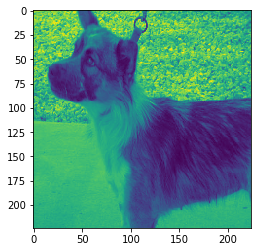

In [3]:
image = cv2.imread("./CatsAndDogsDataset/train/dog.3.jpg",0)
print(image.shape)
# image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
# display_image(image)
image = image/127.5-1.0
display_grayscale(image)
image = cv2.resize(image, (224,224), interpolation=cv2.INTER_CUBIC)
display_image(image)

## Create Train and Test Datasets


In [4]:
## Training
dogs = []
cats = []
# dog_c = 12499
dog_c = 500
# cat_c = 12499
cat_c = 500
for i in range(dog_c):
    image = cv2.imread("./CatsAndDogsDataset/train/dog.{}.jpg".format(i),0)
    image = image/127.5-1.0
    image = cv2.resize(image, (224,224), interpolation=cv2.INTER_CUBIC)
    dogs.append((image,"dog"))
for i in range(cat_c):
    image = cv2.imread("./CatsAndDogsDataset/train/cat.{}.jpg".format(i),0)
    image = image/127.5-1.0
    image = cv2.resize(image, (224,224), interpolation=cv2.INTER_CUBIC)
    cats.append((image,"cat"))

all_img = dogs + cats
random.shuffle(all_img)
train_dataset = []
train_labels = []
for image, label in all_img:
    train_dataset.append(image)
    train_labels.append(label)

## Testing
dogs = []
cats = []

dog_start = 10499
dog_end = 12499

cat_start = 10499
cat_end = 12499
for i in range(dog_start,dog_end):
    image = cv2.imread("./CatsAndDogsDataset/train/dog.{}.jpg".format(i),0)
    image = image/127.5-1.0
    image = cv2.resize(image, (224,224), interpolation=cv2.INTER_CUBIC)
    dogs.append((image,"dog"))
for i in range(cat_start,cat_end):
    image = cv2.imread("./CatsAndDogsDataset/train/cat.{}.jpg".format(i),0)
    image = image/127.5-1.0
    image = cv2.resize(image, (224,224), interpolation=cv2.INTER_CUBIC)
    cats.append((image,"cat"))

all_img = dogs + cats
random.shuffle(all_img)
test_dataset = []
test_labels = []
for image, label in all_img:
    test_dataset.append(image)
    test_labels.append(label)

print("There are {} images for training\nThere are {} images for testing".format(len(train_dataset),len(test_dataset)))

There are 1000 images for training
There are 4000 images for testing


## Input Data

In [5]:
batch_size = 100
num_iter = 8000

image_size = 224
num_output_classes = 2

X = tf.placeholder(tf.float32,[None,image_size,image_size,1],name="input_image")
Y_ = tf.placeholder(tf.float32,[None, num_output_classes],name="expected_output")

## Layers and Model

In [6]:
# # MODEL 1

# # 224x224x1

# #Layers
# S1 = 8     # 224x224x8  stride 1
# S2 = 16     # 112x112x16  stride 2
# S3 = 32     # 56x56x32  stride 2
# S4 = 64     # 28x28x64  stride 2
# S5 = 128     # 14x14x128  stride 1
# S6 = 800     # 14x14x128
# S7 = 200     
# num_classes = 2

# W1= tf.Variable(tf.truncated_normal([11,11,1,S1], stddev=0.1))
# B1= tf.Variable(tf.ones([S1])/10)

# W2= tf.Variable(tf.truncated_normal([7,7,S1,S2], stddev=0.1))
# B2= tf.Variable(tf.ones([S2])/10)

# W3= tf.Variable(tf.truncated_normal([5,5,S2,S3], stddev=0.1))
# B3= tf.Variable(tf.ones([S3])/10)

# W4= tf.Variable(tf.truncated_normal([4,4,S3,S4], stddev=0.1))
# B4= tf.Variable(tf.ones([S4])/10)

# W5= tf.Variable(tf.truncated_normal([4,4,S4,S5], stddev=0.1))
# B5= tf.Variable(tf.ones([S5])/10)

# W6= tf.Variable(tf.truncated_normal([14*14*S5,S6], stddev=0.1))
# B6= tf.Variable(tf.ones([S6])/10)

# W7= tf.Variable(tf.truncated_normal([S6,S7], stddev=0.1))
# B7= tf.Variable(tf.ones([S7])/10)

# W_final= tf.Variable(tf.truncated_normal([S7,num_classes], stddev=0.1))
# B_final= tf.Variable(tf.ones([num_classes])/10)


# #Model

# def conv2d(layer, weights, biases, stride):
#     return tf.nn.relu(tf.nn.conv2d(layer,weights,strides=[1,stride,stride,1], padding='SAME')  +  biases)


# Y1 = conv2d(X, W1, B1, 1)
# Y2 = conv2d(Y1, W2, B2, 2)
# Y3 = conv2d(Y2, W3, B3, 2)
# Y4 = conv2d(Y3, W4, B4, 2)
# Y5 = conv2d(Y4, W5, B5, 2)

# YY6 = tf.reshape(Y5, shape=[-1, 14 * 14 * S5])
# pkeep = tf.placeholder(tf.float32)

# Y6 = tf.nn.relu(tf.matmul(YY6,W6) + B6)
# Y6 = tf.nn.dropout(Y6,pkeep)

# Y7 = tf.nn.softmax(tf.matmul(Y6,W7) + B7)

# Ylogits = tf.matmul(Y7,W_final) + B_final
# Y = tf.nn.softmax(Ylogits,name = "result")


In [7]:
# # MODEL 2

# # 224x224x1

# #Layers
# S1 = 6     # 224x224x6  stride 1       56x56x6  stride 4
# S2 = 12     # 112x112x12  stride 2       28x28x12  stride 2
# S3 = 16     # 56x56x16  stride 2       14x14x16  stride 2
# S4 = 800     
# num_classes = 2

# W1= tf.Variable(tf.truncated_normal([11,11,1,S1], stddev=0.1))
# B1= tf.Variable(tf.ones([S1])/10)

# W2= tf.Variable(tf.truncated_normal([7,7,S1,S2], stddev=0.1))
# B2= tf.Variable(tf.ones([S2])/10)

# W3= tf.Variable(tf.truncated_normal([5,5,S2,S3], stddev=0.1))
# B3= tf.Variable(tf.ones([S3])/10)

# W4= tf.Variable(tf.truncated_normal([56*56*S3,S4], stddev=0.1))
# B4= tf.Variable(tf.ones([S4])/10)

# W_final= tf.Variable(tf.truncated_normal([S4,num_classes], stddev=0.1))
# B_final= tf.Variable(tf.ones([num_classes])/10)


# #Model

# def conv2d(layer, weights, biases, stride):
#     return tf.nn.relu(tf.nn.conv2d(layer,weights,strides=[1,stride,stride,1], padding='SAME')  +  biases)


# Y1 = conv2d(X, W1, B1, 4)
# Y2 = conv2d(Y1, W2, B2, 2)
# Y3 = conv2d(Y2, W3, B3, 2)

# YY = tf.reshape(Y3, shape=[-1, 56 * 56 * S3])
# pkeep = tf.placeholder(tf.float32)

# Y4 = tf.nn.relu(tf.matmul(YY,W4) + B4)
# Y4 = tf.nn.dropout(Y4,pkeep)

# Ylogits = tf.matmul(Y4,W_final) + B_final
# Y = tf.nn.softmax(Ylogits,name = "result")


In [8]:
# # MODEL 3

# # 224x224x1

# #Layers
# S1 = 6     # 224x224x6  stride 1       112x112x6  stride 2
# S2 = 12     # 112x112x12  stride 2       56x56x12  stride 2
# S3 = 24     # 56x56x16  stride 2       28x28x16  stride 2
# S4 = 200     
# num_classes = 2

# W1= tf.Variable(tf.truncated_normal([11,11,1,S1], stddev=0.1))
# B1= tf.Variable(tf.ones([S1])/10)

# W2= tf.Variable(tf.truncated_normal([5,5,S1,S2], stddev=0.1))
# B2= tf.Variable(tf.ones([S2])/10)

# W3= tf.Variable(tf.truncated_normal([3,3,S2,S3], stddev=0.1))
# B3= tf.Variable(tf.ones([S3])/10)

# W4= tf.Variable(tf.truncated_normal([28*28*S3,S4], stddev=0.1))
# B4= tf.Variable(tf.ones([S4])/10)

# W_final= tf.Variable(tf.truncated_normal([S4,num_classes], stddev=0.1))
# B_final= tf.Variable(tf.ones([num_classes])/10)

# #Model

# def conv2d(layer, weights, biases, stride):
#     return tf.nn.relu(tf.nn.conv2d(layer,weights,strides=[1,stride,stride,1], padding='SAME')  +  biases)


# Y1 = conv2d(X, W1, B1, 2)
# Y2 = conv2d(Y1, W2, B2, 2)
# Y3 = conv2d(Y2, W3, B3, 2)

# YY = tf.reshape(Y3, shape=[-1, 28 * 28 * S3])
# pkeep = tf.placeholder(tf.float32)

# Y4 = tf.nn.relu(tf.matmul(YY,W4) + B4)
# Y4 = tf.nn.dropout(Y4,pkeep)

# Ylogits = tf.matmul(Y4,W_final) + B_final
# Y = tf.nn.softmax(Ylogits,name = "result")


In [9]:
# MODEL 4

# 224x224x1

#Layers
S1 = 32     # 224x224x6  stride 1       112x112x16  stride 2
S2 = 64     # 112x112x12  stride 2       56x56x32  stride 2
S3 = 128     # 56x56x16  stride 2       28x28x64  stride 2
S4 = 1024     
num_classes = 2

W1= tf.Variable(tf.truncated_normal([11,11,1,S1], stddev=0.1))
B1= tf.Variable(tf.ones([S1])/10)

W2= tf.Variable(tf.truncated_normal([5,5,S1,S2], stddev=0.1))
B2= tf.Variable(tf.ones([S2])/10)

W3= tf.Variable(tf.truncated_normal([3,3,S2,S3], stddev=0.1))
B3= tf.Variable(tf.ones([S3])/10)

W4= tf.Variable(tf.truncated_normal([28*28*S3,S4], stddev=0.1))
B4= tf.Variable(tf.ones([S4])/10)

W_final= tf.Variable(tf.truncated_normal([S4,num_classes], stddev=0.1))
B_final= tf.Variable(tf.ones([num_classes])/10)

#Model

def conv2d(layer, weights, biases, stride):
    return tf.nn.relu(tf.nn.conv2d(layer,weights,strides=[1,stride,stride,1], padding='SAME')  +  biases)


Y1 = conv2d(X, W1, B1, 2)
Y2 = conv2d(Y1, W2, B2, 2)
Y3 = conv2d(Y2, W3, B3, 2)

YY = tf.reshape(Y3, shape=[-1, 28 * 28 * S3])
pkeep = tf.placeholder(tf.float32)

Y4 = tf.nn.relu(tf.matmul(YY,W4) + B4)
Y4 = tf.nn.dropout(Y4,pkeep)

Ylogits = tf.matmul(Y4,W_final) + B_final
Y = tf.nn.softmax(Ylogits,name = "result")


In [10]:
# ## Model 5

# # S1 = 32     # 224x224x6  stride 1       112x112x16  stride 2
# # S2 = 64     # 112x112x12  stride 2       56x56x32  stride 2
# # S3 = 128     # 56x56x16  stride 2       28x28x64  stride 2

# #Layers
# S1 = 6     # 224x224x6  stride 1
# S2 = 12     # 112x112x12  stride 2
# S3 = 24     # 56x56x16  stride 2
# S4 = 200
# num_classes = 2

# W1= tf.Variable(tf.truncated_normal([6,6,1,S1], stddev=0.1))
# B1= tf.Variable(tf.ones([S1])/10)

# W2= tf.Variable(tf.truncated_normal([5,5,S1,S2], stddev=0.1))
# B2= tf.Variable(tf.ones([S2])/10)

# W3= tf.Variable(tf.truncated_normal([4,4,S2,S3], stddev=0.1))
# B3= tf.Variable(tf.ones([S3])/10)

# W4= tf.Variable(tf.truncated_normal([56*56*S3,S4], stddev=0.1))
# B4= tf.Variable(tf.ones([S4])/10)

# W_final= tf.Variable(tf.truncated_normal([S4,num_classes], stddev=0.1))
# B_final= tf.Variable(tf.ones([num_classes])/10)


# #Model

# def conv2d(layer, weights, biases, stride):
#     return tf.nn.relu(tf.nn.conv2d(layer,weights,strides=[1,stride,stride,1], padding='SAME')  +  biases)


# Y1 = conv2d(X, W1, B1, 1)
# Y2 = conv2d(Y1, W2, B2, 2)
# Y3 = conv2d(Y2, W3, B3, 2)
# YY = tf.reshape(Y3, shape=[-1, 56 * 56 * S3])
# pkeep = tf.placeholder(tf.float32)

# Y4 = tf.nn.relu(tf.matmul(YY,W4) + B4)
# Y4 = tf.nn.dropout(Y4,pkeep)

# Ylogits = tf.matmul(Y4,W_final) + B_final
# Y = tf.nn.softmax(Ylogits,name = "result")


## Accuracy, Cros-Entropy, Learning Rate, Optimizer

In [11]:
cros_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=Ylogits,labels=Y_)
cros_entropy = tf.reduce_mean(cros_entropy) *  100

corect_prediction = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
accuracy = tf.reduce_mean(tf.cast(corect_prediction, tf.float32))

step_lr = tf.placeholder(tf.int32)
lr = 0.0001 + tf.train.exponential_decay(0.005,step_lr,num_iter,1/math.e)
optimizer = tf.train.AdamOptimizer(lr).minimize(cros_entropy)
saver = tf.train.Saver()

# merged = tf.summary.merge_all()
# train_writer = tf.summary.FileWriter(FLAGS.summaries_dir + '/train',
#                                       sess.graph)
# test_writer = tf.summary.FileWriter(FLAGS.summaries_dir + '/test')

In [12]:
def reshape_batch_img(batch_x,batch_size):
    new_batch = []
    for img in batch_x:
        img = np.array(img).reshape(224, 224, 1)
        new_batch.append(img)
    return new_batch

def reshape_batch_label(batch_x):
    new_batch = []
    for label in batch_x:
        item = np.zeros((2,), dtype=np.float32)
        if label == "dog":
            item[0] = 1.
        else:
            item[1] = 1.
        new_batch.append(item)
    return new_batch

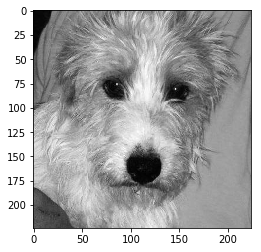

dog


In [13]:
def mix_data(train_dataset, train_labels, batch_size):
    full = []
    data = []
    labels = []
    for i in range(len(train_dataset)):
        full.append((train_dataset[i],train_labels[i]))
    random.shuffle(full)
    for img, label in full:
        data.append(img)
        labels.append(label)
    return data[:batch_size], labels[:batch_size]
data, labels = mix_data(train_dataset,train_labels,100)
display_grayscale(data[0])
print(labels[0])


## Train

In [ ]:
init = tf.global_variables_initializer()
prev_acc = 0

with tf.Session() as sess:
    sess.run(init)
    
    step = 1
    batch_pos = 0
    
    while step*batch_size < num_iter:
#         # WIP: if at the and of the training data then reuse
#         batch_x = train_dataset[batch_pos:batch_pos+batch_size]
#         batch_x = reshape_batch_img(batch_x,batch_size)
#         batch_y = train_labels[batch_pos:batch_pos+batch_size]
# #         print(batch_y)
#         batch_y = reshape_batch_label(batch_y)
# #         print(batch_y)
#         batch_pos += batch_size
        
        batch_x, batch_y = mix_data(train_dataset,train_labels,batch_size)
        batch_x = reshape_batch_img(batch_x,batch_size)
        batch_y = reshape_batch_label(batch_y)    
    
        sess.run(optimizer, feed_dict={X: batch_x, Y_: batch_y, pkeep: 0.75, step_lr:step})
#         train_writer.add_summary(summary, step)
    
        print("Step: {}".format(step))
        if step % 5 == 0:
            loss, acc = sess.run([cros_entropy,accuracy],feed_dict={X: batch_x, Y_: batch_y, pkeep: 1., step_lr:step})
            print("Iter " + str(step*batch_size) + ", Loss= " + \
                  "{:.6f}".format(loss) + ", Accuracy= " + \
                  "{:.5f}".format(acc))
        
            if acc > prev_acc:
                prev_acc = acc
                saver.save(sess,"./CatsAndDogsModel/model")
        
        step+=1
        
    if step % 10 == 0:
            loss, acc = sess.run([cros_entropy,accuracy],feed_dict={X: batch_x, Y_: batch_y, pkeep: 1., step_lr:step})
            print("Iter " + str(step*batch_size) + ", Loss= " + \
                  "{:.6f}".format(loss) + ", Accuracy= " + \
                  "{:.5f}".format(acc))
        
            if acc > prev_acc:
                prev_acc = acc
                saver.save(sess,"./CatsAndDogsModel/model")
    
    batch_x = reshape_batch_img(test_dataset[:1000],batch_size)
    batch_y = reshape_batch_label(test_labels[:1000])
    
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: batch_x, Y_: batch_y, pkeep: 1., step_lr:step}))
# tf.reset_default_graph()

Step: 1
Step: 2
Step: 3
Step: 4
Step: 5
Iter 500, Loss= 1531.227661, Accuracy= 0.46000
Step: 6
Step: 7
Step: 8
Step: 9
Step: 10
Iter 1000, Loss= 73.248970, Accuracy= 0.46000
Step: 11
Step: 12
Step: 13
Step: 14
Step: 15
Iter 1500, Loss= 68.150200, Accuracy= 0.57000
Step: 16
Step: 17
Step: 18
Step: 19
Step: 20
Iter 2000, Loss= 69.465958, Accuracy= 0.52000
Step: 21
Step: 22
Step: 23
Step: 24
Step: 25
Iter 2500, Loss= 67.378532, Accuracy= 0.57000
Step: 26
Step: 27
Step: 28
Step: 29
Step: 30
Iter 3000, Loss= 67.571083, Accuracy= 0.54000
Step: 31
Step: 32
Step: 33
Step: 34
Step: 35
Iter 3500, Loss= 67.811012, Accuracy= 0.55000
Step: 36
Step: 37
Step: 38
Step: 39
Step: 40
Iter 4000, Loss= 68.538017, Accuracy= 0.57000
Step: 41
Step: 42
Step: 43
Step: 44
Step: 45
Iter 4500, Loss= 68.733124, Accuracy= 0.56000
Step: 46
Step: 47
Step: 48
Step: 49
Step: 50
Iter 5000, Loss= 68.728630, Accuracy= 0.55000
Step: 51
Step: 52
Step: 53
Step: 54
Step: 55
Iter 5500, Loss= 68.205849, Accuracy= 0.58000
Step: 5

## Test

In [14]:
sess=tf.Session()    
saver = tf.train.import_meta_graph('./CatsAndDogsModel/model.meta')
saver.restore(sess,tf.train.latest_checkpoint('./CatsAndDogsModel/'))


graph = tf.get_default_graph()


start = 0
how_many = 1000
count = 0

y_true = []
y_pred = []

for i in range(start,start+how_many):
    image = test_dataset[i]
#     display_grayscale(image)
    image = reshape_batch_img([image],1)

    label = test_labels[i]
    item = []
    item = np.zeros((2,), dtype=np.float32)
    if label == "dog":
        item[0] = 1.
    else:
        item[1] = 1.
    item = [item]

    feed_dict ={X:image, Y_:item, pkeep:1, step_lr:0.0001}

    op_to_restore = graph.get_tensor_by_name("result:0")
    rez = sess.run(op_to_restore,feed_dict)
    from pprint import pprint
#     pprint(np.argmax(rez,1))
    
    y_true.append(label)
    y_pred.append("dog" if np.argmax(rez) == 1. else "cat")
    
    if test_labels[i] == "dog" and np.argmax(rez) == 1.:
        count+=1
    elif test_labels[i] == "cat" and np.argmax(rez) == 0.:
        count+=1
    else:
        pass
#         pprint("Should be: {} is {}".format(test_labels[i],'dog' if np.argmax(rez)==1. else 'cat'))
#         image = test_dataset[i]
#         display_grayscale(image)
#     print("{}/{} = {}".format(count, i - start, count/(i - start + 1)))
    
print("{}/{} = {}".format(count, how_many, count/how_many))


print(confusion_matrix(y_true, y_pred, labels=["dog", "cat"]))

INFO:tensorflow:Restoring parameters from ./CatsAndDogsModel/model
476/1000 = 0.476
[[  3 523]
 [  1 473]]


In [ ]:
    dog cat
dog  0  499
cat  0  501